## Data imputation
In this notebook the inputation algorithms implemented are shown. This step is carried out in an Jupyter notebook with an R kernel available.

In [11]:
library(readr)
library(imputeTS)

In [12]:
stacked.imputation <- function(tseries) {
  tseriesimp <- na_seadec(tseries,  algorithm = "interpolation")
  if (length(tseriesimp[tseriesimp <0])>0) {
    tseriesimp[tseriesimp <0] <-NA
    tseriesimp <- na_seadec(tseriesimp, algorithm = "mean")
  }
  return(tseriesimp)
}

Gerimputation <- function(datapath,station) {
  #Fuction to read the csv file
  df.station <-read_csv(paste(datapath, station,".csv",sep=""), 
    col_types = cols(FECHA = col_datetime(format = "%Y-%m-%d %H:%M:%S")))
  
  df.tsstation<-ts(df.station[,2:16], start = c(2012,0), frequency = 365.25*24)
  df.tsstation_imputed=df.tsstation #initialization
  for (i in 1:(dim(df.tsstation)[2])){
    df.tsstation_imputed[,i] <- stacked.imputation(df.tsstation[,i])
  }

  #for each variable perform the imputation and save in a csv and plot 
  #in a folder imputedG with subfolders data and plots.
  return(df.tsstation_imputed)
}

## Testing with the Nortweast station
Here we are going to test the imputation algorithm with the Northwest station. 

In [13]:
station_data_path="../data/Monterrey/cleaned_station/NOROESTE.csv"

NOROESTE <- read_csv(station_data_path,
    col_types = cols(FECHA = col_datetime(format = "%Y-%m-%d %H:%M:%S")))
#View(NOROESTE)

In [14]:
str(NOROESTE)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	52608 obs. of  16 variables:
 $ FECHA: POSIXct, format: "2012-01-01 00:00:00" "2012-01-01 01:00:00" ...
 $ CO   : num  2.08 5.2 2.51 3.33 1.26 0.91 1.68 1.06 0.66 0.66 ...
 $ NO   : num  16.6 154.4 47.4 96.7 10 ...
 $ NO2  : num  57.8 60.4 51.1 49 39.3 27.4 40 23.1 14.9 12.7 ...
 $ NOX  : num  74.4 214.8 98.5 145.7 49.3 ...
 $ O3   : num  5 8 4 6 7 8 3 12 22 25 ...
 $ PM10 : num  300 255 433 216 212 110 86 131 206 64 ...
 $ PM2.5: num  NA NA NA NA NA NA NA NA NA NA ...
 $ PRS  : num  716 716 716 716 717 ...
 $ RAINF: num  0 0 0 0 0 0 0 0 0 0 ...
 $ RH   : num  31 34 34 34 28 25 29 33 34 37 ...
 $ SO2  : num  14.5 16.5 10.9 9.9 7.5 6.4 6.7 6.5 6.5 6.4 ...
 $ SR   : num  0 0 0 0 0 0 0 0.006 0.062 0.06 ...
 $ TOUT : num  18.6 17.6 17.1 17 17.8 ...
 $ WDR  : num  330 295 332 310 317 318 281 37 111 220 ...
 $ WSR  : num  6.8 2.4 5.3 8.1 11 11.8 5.1 14.6 6 9.1 ...
 - attr(*, "spec")=
  .. cols(
  ..   FECHA = col_datetime(format = "%Y-

In [15]:
tsNOROESTE<-ts(NOROESTE, start = c(2012,0), frequency = 365.25*24)

imputed <-Gerimputation("../data/Monterrey/cleaned_station/","NOROESTE")
save(imputed, file="../data/Monterrey/processed/NOROESTE.RData")
#write.csv(cbind(NOROESTE[,1],imputed), file="../data/Monterrey/processed/NOROESTE.csv", row.names = FALSE)

## Visualize imputations

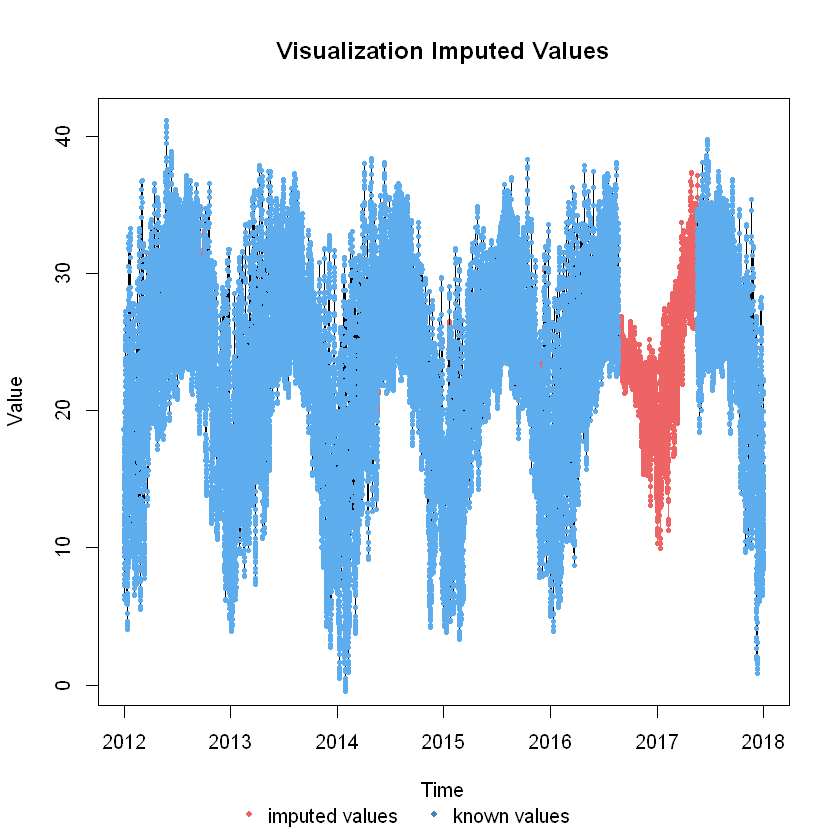

In [16]:
plotNA.imputations(tsNOROESTE[,'TOUT'],imputed[,"TOUT"])

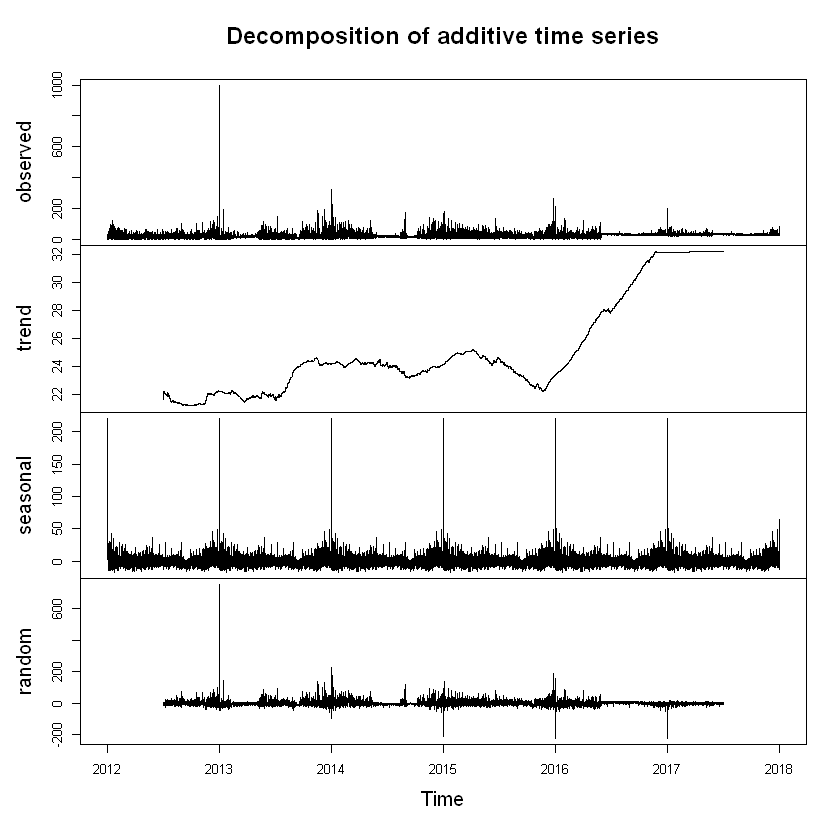

In [17]:
#Seasonalidad, diaria no capturada
imputeddecomposed <-decompose(imputed[,'PM2.5'])
plot(imputeddecomposed)